In [52]:
from scipy.integrate import odeint
from array import *
from scipy.optimize import curve_fit
import scipy.integrate as spi
from lmfit import minimize, Parameters, Model, fit_report
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
import math
import pandas as pd
import seaborn as sns

%matplotlib inline


In [53]:
def PD_Model (Conc, E_base, E_max, IC50, Hill_Coeff):
    E = E_base + np.divide(np.multiply(E_max,np.power(Conc,Hill_Coeff)),(np.power(IC50, Hill_Coeff)+np.power(Conc,Hill_Coeff)))
    return E
PDModel = Model(PD_Model)

In [54]:
Data = [{'Arb':0, 'Nit':0, 'Res':0.10}]
Data.append({'Arb':0, 'Nit':0.63, 'Res':4.90})
Data.append({'Arb':0, 'Nit':1.25, 'Res':5.40})
Data.append({'Arb':0, 'Nit':2.5, 'Res':13.90})
Data.append({'Arb':0, 'Nit':5, 'Res':34.80})
Data.append({'Arb':0, 'Nit':10, 'Res':70.10})

Data.append({'Arb':0.63, 'Nit':0.0, 'Res':1.00})
Data.append({'Arb':0.63, 'Nit':0.63, 'Res':-5.00})
Data.append({'Arb':0.63, 'Nit':1.25, 'Res':6.00})
Data.append({'Arb':0.63, 'Nit':2.5, 'Res':10.10})
Data.append({'Arb':0.63, 'Nit':5, 'Res':31.40})
Data.append({'Arb':0.63, 'Nit':10, 'Res':53.30})

Data.append({'Arb':1.25, 'Nit':0.0, 'Res':6.30})
Data.append({'Arb':1.25, 'Nit':0.63, 'Res':9.00})
Data.append({'Arb':1.25, 'Nit':1.25, 'Res':17.70})
Data.append({'Arb':1.25, 'Nit':2.5, 'Res':14.60})
Data.append({'Arb':1.25, 'Nit':5, 'Res':46.60})
Data.append({'Arb':1.25, 'Nit':10, 'Res':59.90})

Data.append({'Arb':2.5, 'Nit':0.0, 'Res':1.10})
Data.append({'Arb':2.5, 'Nit':0.63, 'Res':7.60})
Data.append({'Arb':2.5, 'Nit':1.25, 'Res':12.00})
Data.append({'Arb':2.5, 'Nit':2.5, 'Res':27.80})
Data.append({'Arb':2.5, 'Nit':5, 'Res':28.80})
Data.append({'Arb':2.5, 'Nit':10, 'Res':64.50})

Data.append({'Arb':5, 'Nit':0.0, 'Res':6.90})
Data.append({'Arb':5, 'Nit':0.63, 'Res':15.20})
Data.append({'Arb':5, 'Nit':1.25, 'Res':20.20})
Data.append({'Arb':5, 'Nit':2.5, 'Res':44.20})
Data.append({'Arb':5, 'Nit':5, 'Res':56.10})
Data.append({'Arb':5, 'Nit':10, 'Res':79.20})

Data.append({'Arb':10, 'Nit':0.0, 'Res':36.30})
Data.append({'Arb':10, 'Nit':0.63, 'Res':87.30})
Data.append({'Arb':10, 'Nit':1.25, 'Res':100.00})
Data.append({'Arb':10, 'Nit':2.5, 'Res':99.20})
Data.append({'Arb':10, 'Nit':5, 'Res':81.50})
Data.append({'Arb':10, 'Nit':10, 'Res':72.20})

In [55]:
Data_df = pd.DataFrame(Data)

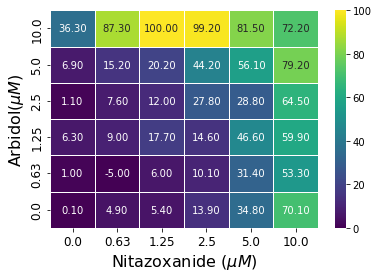

In [83]:
Data_plot = Data_df.pivot('Arb', 'Nit', 'Res')
ax1 = sns.heatmap(Data_plot, vmin =0, vmax = 100, annot = True, fmt = '0.2f',cmap ='viridis', linewidth = 1)
ax1.invert_yaxis()
ax1.set_ylabel("Arbidol($\mu M$)", fontsize=16)
ax1.tick_params(axis="y", labelsize = 12)
ax1.set_xlabel('Nitazoxanide ($\mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 12)

## Model A:
#### Arbidol upstream
#### Nitozaxonide downstream

In [57]:
Arb = Data_df.Arb.unique()
Nit = Data_df.Nit.unique()
UpstreamRes = np.asarray(Data_df[Data_df.Nit==0].Res/100)
Downstream_Isol = np.asarray(Data_df[Data_df.Arb==0].Res/100)
Downstream_Res=[]


In [58]:
PDModel.set_param_hint('E_base', value=0, vary = False)
PDModel.set_param_hint('E_max', value=0.5, min=0, max=1)
PDModel.set_param_hint('IC50', value=10, min=0, max=np.inf)
PDModel.set_param_hint('Hill_Coeff', value=3, min=0, max=np.inf)
params = PDModel.make_params()

In [59]:
result_Arb= PDModel.fit(UpstreamRes, params, Conc=Arb)
result_Nit_Isol = PDModel.fit(Downstream_Isol, params, Conc=Nit)

In [60]:
result_Arb

In [61]:
np.sum((result_Arb.best_fit-UpstreamRes)**2)

0.0038941112746175245

In [84]:
for i in range(0,6):
    if i==0:
        E_A = result_Arb.best_fit
        E_N_Isol = result_Nit_Isol.best_fit
    else:
        E_A = np.vstack((E_A,result_Arb.best_fit))
        E_N_Isol = np.vstack((E_N_Isol,result_Nit_Isol.best_fit))

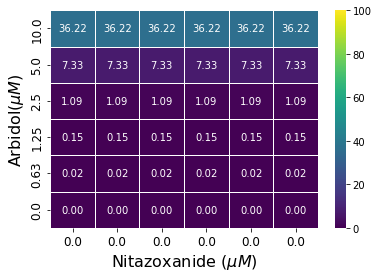

In [85]:
ax1 = sns.heatmap(E_A.T*100, vmin =0, vmax = 100, annot = True, fmt = '0.2f',cmap ='viridis', linewidth = 1, 
                  yticklabels =Arb , xticklabels =np.zeros(6) )
ax1.invert_yaxis()
ax1.set_ylabel("Arbidol($\mu M$)", fontsize=16)
ax1.tick_params(axis="y", labelsize = 12)
ax1.set_xlabel('Nitazoxanide ($\mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 12)

In [62]:
result_Nit_Isol

In [63]:
np.sum((result_Nit_Isol.best_fit-Downstream_Isol)**2)

0.0022881755038693225

0.63
0.006895136243711773
1.25
0.01380193888190374
2.5
0.016628071324360158
5.0
0.0050197346626903085
10.0
0.06082334883476187


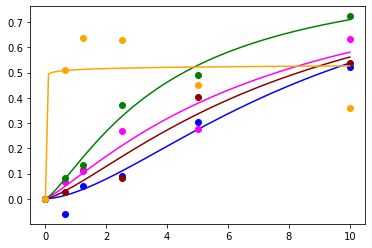

In [86]:
result_Nit=[]
IC50 =[8.95,6.82,5,7.46, 4.096]
Hill = [1.528,1.14,1.2,1.303, 1.994]
color = ['b', 'darkred', 'magenta', 'green', 'orange']
i=0
Ecombo = result_Nit_Isol.best_fit
E_N = result_Nit_Isol.best_fit
for UpConc in Arb[1:]:
    print(UpConc)
    PDModel.set_param_hint('E_base', value=0, vary = False)
    PDModel.set_param_hint('IC50', value=IC50[i], min=0, max=np.inf)
    PDModel.set_param_hint('Hill_Coeff', value=Hill[i], min=0, max=np.inf)
    PDModel.set_param_hint('E_max', value=1-PDModel.eval(result_Arb.params, Conc = UpConc), min=0, max=1, vary=False)
    params = PDModel.make_params()
    Downstream_Res = (np.asarray(Data_df[Data_df.Arb == UpConc].Res)-
                      np.asarray(Data_df[(Data_df.Nit == 0)&(Data_df.Arb == UpConc)].Res))/100
   # Downstream_Res= (np.asarray(Data_df[Data_df.Rem == UpConc].Res)/100-
   #                   PDModel.eval(result_Rem.params, Conc = UpConc))
    result_Nit.append(PDModel.fit(Downstream_Res, params, Conc=Nit))
    print(np.sum((result_Nit[-1].best_fit-Downstream_Res)**2))
    Ecombo = np.vstack((Ecombo, PDModel.eval(result_Nit[i].params, Conc = Nit)+PDModel.eval(result_Arb.params, Conc = UpConc)))
    E_N = np.vstack((E_N, result_Nit[-1].best_fit))
    plt.plot(Nit, Downstream_Res, 'o', color = color[i])
    plt.plot(np.linspace(Nit[0],Nit[-1], 100), 
             PDModel.eval(result_Nit[i].params, Conc = np.linspace(Nit[0],Nit[-1], 100)),  color = color[i])
    i=i+1

In [81]:
result_Nit[4]

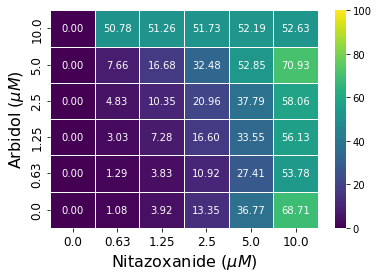

In [87]:
ax1 = sns.heatmap(E_N*100, vmin =0, vmax = 100, annot = True, fmt = '0.2f',cmap ='viridis', linewidth = 1, 
                  yticklabels = Arb, xticklabels =Nit)
ax1.invert_yaxis()
ax1.set_ylabel("Arbidol ($\mu M$)", fontsize=16)
ax1.tick_params(axis="y", labelsize = 12)
ax1.set_xlabel('Nitazoxanide ($\mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 12)

In [66]:
result_Nit[4].params['IC50'].value=4.021
result_Nit[4].params['Hill_Coeff'].value=1.298
Ecombo[-1] = PDModel.eval(result_Nit[4].params, Conc = Nit)+PDModel.eval(result_Arb.params, Conc = 10)

In [73]:
Ecombo*100

array([[0.00000000e+00, 1.08473800e+00, 3.91862533e+00, 1.33459670e+01,
        3.67730811e+01, 6.87139775e+01],
       [2.18878953e-02, 1.31245356e+00, 3.84694671e+00, 1.09396922e+01,
        2.74348190e+01, 5.38022712e+01],
       [1.53363180e-01, 3.18533739e+00, 7.43060303e+00, 1.67572249e+01,
        3.37046369e+01, 5.62856755e+01],
       [1.09032127e+00, 5.91954516e+00, 1.14436099e+01, 2.20472486e+01,
        3.88769914e+01, 5.91549179e+01],
       [7.33123437e+00, 1.49950572e+01, 2.40064286e+01, 3.98101928e+01,
        6.01763732e+01, 7.82633127e+01],
       [3.62150972e+01, 8.69973142e+01, 8.74752836e+01, 8.79451799e+01,
        8.84014359e+01, 8.88441473e+01]])

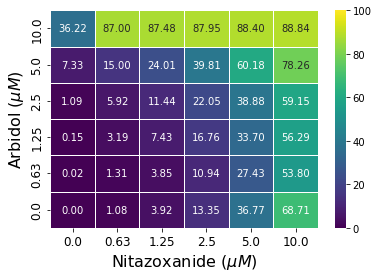

In [89]:
ax = sns.heatmap(Ecombo*100, vmin =0, vmax = 100, annot = True, fmt = '.2f' ,cmap ='viridis', linewidth = 1,
                 yticklabels = Arb, xticklabels = Nit)
ax.invert_yaxis()
ax.set_ylabel("Arbidol ($\mu M$)", fontsize=16)
ax.tick_params(axis="y", labelsize = 12)
ax.set_xlabel('Nitazoxanide ($\mu M$)', fontsize=16)
ax.tick_params(axis="x", labelsize = 12)

In [75]:
Data_array= np.asarray(Data_plot)
Data_array

array([[  0.1,   4.9,   5.4,  13.9,  34.8,  70.1],
       [  1. ,  -5. ,   6. ,  10.1,  31.4,  53.3],
       [  6.3,   9. ,  17.7,  14.6,  46.6,  59.9],
       [  1.1,   7.6,  12. ,  27.8,  28.8,  64.5],
       [  6.9,  15.2,  20.2,  44.2,  56.1,  79.2],
       [ 36.3,  87.3, 100. ,  99.2,  81.5,  72.2]])

In [76]:
np.sum((Data_array-Ecombo*100)**2)

1272.1811459537412

In [77]:
np.sum((Data_array-np.mean(Data_array))**2)

34071.398888888885

In [78]:
1-np.sum((Data_array-Ecombo*100)**2)/np.sum((Data_array-np.mean(Data_array))**2)

0.9626613174850118

In [90]:
delta_E = Ecombo*100-np.minimum(100,(E_N_Isol*100+E_A.T*100))

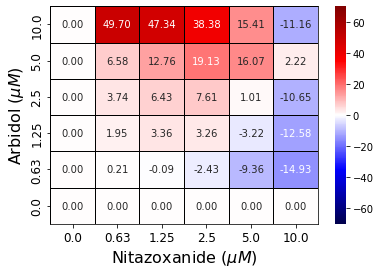

In [92]:
ax = sns.heatmap(delta_E, vmin =-70, vmax = 70, annot = True, fmt = '.2f', cmap ='seismic', linewidth = 0.5, 
                 linecolor = 'k', yticklabels = Arb, xticklabels = Nit)
ax.invert_yaxis()
ax.set_ylabel("Arbidol ($\mu M$)", fontsize=16)
ax.tick_params(axis="y", labelsize = 12)
ax.set_xlabel('Nitazoxanide ($\mu M$)', fontsize=16)
ax.tick_params(axis="x", labelsize = 12)
for _, spine in ax.spines.items(): 
    spine.set_visible(True) 
    spine.set_linewidth(0.75)

In [79]:
IC50_Nit = [6.634]
IC50_Nit_err = [2.04]
Hill_Nit = [1.917]
Hill_Nit_err = [0.43]
for i in range(0,len(Arb[1:])):
    IC50_Nit.append(result_Nit[i].params['IC50'].value)
    IC50_Nit_err.append(result_Nit[i].params['IC50'].stderr)
    Hill_Nit.append(result_Nit[i].params['Hill_Coeff'].value)
    Hill_Nit_err.append(result_Nit[i].params['Hill_Coeff'].stderr)

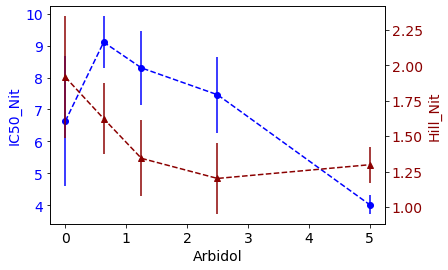

In [80]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx() 
ax1.errorbar(Arb[0:5], IC50_Nit[0:5], yerr = IC50_Nit_err[0:5], fmt =  '--o', color = 'b')
ax1.set_ylabel("IC50_Nit", color='b', fontsize=14)
ax1.tick_params(axis="y", labelcolor='b',labelsize = 14)
ax1.set_xlabel('Arbidol', fontsize=14)
ax1.tick_params(axis="x", labelsize = 14)
ax2.errorbar(Arb[0:5], Hill_Nit[0:5], yerr = Hill_Nit_err[0:5], fmt = '--^', color = 'darkred')
ax2.set_ylabel("Hill_Nit", color='darkred', fontsize=14)
ax2.tick_params(axis="y", labelcolor='darkred', labelsize = 14)

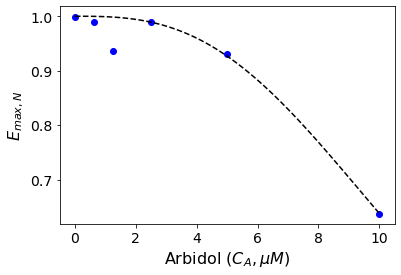

In [94]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.plot(Arb, 1-np.asarray(Data_df[(Data_df.Nit == 0)].Res)/100, 'o', color = 'b')
ax1.plot(np.linspace(Arb[0], Arb[-1], 100), 
         1-PDModel.eval(result_Arb.params, Conc = np.linspace(Arb[0], Arb[-1], 100)), '--', color = 'k')
ax1.set_ylabel("$E_{max,N}$", fontsize=16)
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_xlabel('Arbidol ($C_A, \mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 14)

In [96]:
from sklearn.metrics import r2_score
r2_score(1-np.asarray(Data_df[(Data_df.Nit == 0)].Res)/100, 1-PDModel.eval(result_Arb.params, Conc = Arb))

0.9595092383197176

In [128]:
def quadratic(x, a, b, c):
    return a*x**2+b*x+c

quadratic_model = Model(quadratic)

quadratic_model.set_param_hint('a', value=-2, min = -np.inf, max = 0)
quadratic_model.set_param_hint('b', value=0.2, min=0, max=10)
quadratic_model.set_param_hint('c', value=6.5, min=0, max=np.inf)

#dbl_exp_model.set_param_hint('e', value=0, min=-np.inf, max=np.inf)
params = quadratic_model.make_params()

IC50_N = quadratic_model.fit(IC50_Nit[0:5], params, x = Arb[0:5], weights = 1.0/np.asarray(IC50_Nit_err[0:5]))
IC50_N = quadratic_model.fit(IC50_Nit[0:5], params, x = Arb[0:5])

In [129]:
IC50_N

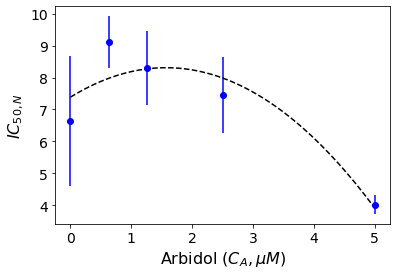

In [130]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.errorbar(Arb[0:5], IC50_Nit[0:5], yerr = IC50_Nit_err[0:5], fmt =  'o', color = 'b')
ax1.plot(np.linspace(Arb[0], Arb[4], 100), 
         quadratic_model.eval(IC50_N.params, x=np.linspace(Arb[0], Arb[4], 100)), '--', color = 'k')
ax1.set_ylabel("$IC_{50,N}$", fontsize=16)
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_xlabel('Arbidol ($C_A, \mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 14)

In [131]:
r2_score(IC50_Nit[0:5], quadratic_model.eval(IC50_N.params, x=Arb[0:5]))

0.8609378682936675

In [134]:
def exp(x, a, b, c):
    return a*np.exp(b*x)+c
exp_model = Model(exp)

exp_model.set_param_hint('a', value=3.5, min = 0, max = np.inf)
exp_model.set_param_hint('b', value=-0.5, min=-np.inf, max=0)
exp_model.set_param_hint('c', value=0.5, min=0, max=np.inf)

#dbl_exp_model.set_param_hint('e', value=0, min=-np.inf, max=np.inf)
params = exp_model.make_params()

Hill_N = exp_model.fit(Hill_Nit[0:5], params, x = Arb[0:5], weights = 1.0/np.asarray(Hill_Nit_err[0:5]))


In [135]:
Hill_N

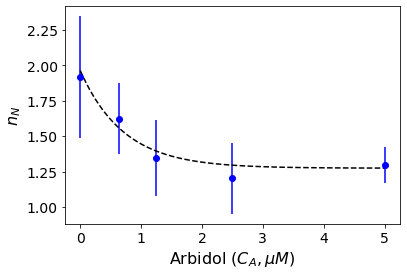

In [137]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.errorbar(Arb[0:5], Hill_Nit[0:5], yerr = Hill_Nit_err[0:5], fmt =  'o', color = 'b')
ax1.plot(np.linspace(Arb[0], Arb[4], 100), 
         exp_model.eval(Hill_N.params, x=np.linspace(Arb[0], Arb[4], 100)), '--', color = 'k')
ax1.set_ylabel("$n_{N}$", fontsize=16)
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_xlabel('Arbidol ($C_A, \mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 14)

In [138]:
r2_score(Hill_Nit[0:5], exp_model.eval(Hill_N.params, x=Arb[0:5]), sample_weight =1.0/np.asarray(Hill_Nit_err[0:5]) )

0.9343893462000703